## import library

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np 
import matplotlib.pyplot as plt 

## Get MNIST Data. 
### MNIST data loacted in tensorflow > keras > datasets > mnist 
### Split data to (train images, train labels) and (test images, test labels)

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### There are Total 60000 Train images and Train labels. (6000 images for single class)
### Shape of single image is 28 x 28 (pixel)
### 

In [3]:
print('Shape of Train images :',train_images.shape)
print('Shape of Train labels : ', train_labels.shape)
print('\nShape of Test images : ', test_images.shape)
print("Shape of Test labels : ",test_labels.shape)

Shape of Train images : (60000, 28, 28)
Shape of Train labels :  (60000,)

Shape of Test images :  (10000, 28, 28)
Shape of Test labels :  (10000,)


In [4]:
print('Train labels : ',train_labels)

Train labels :  [5 0 4 ... 5 6 8]


## Plot first train image. 
### when value is close to 0 : dark 
### when value is close to 255 : white

In [5]:
print(train_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

### Plot First 10 Train images and Corresponding labels  

First 10 Train images in MNIST dataset



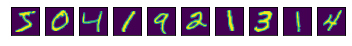


Train labels match with Train label sequentialy
 [5 0 4 1 9 2 1 3 1 4]


In [6]:
print('First 10 Train images in MNIST dataset\n')
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
plt.show()
print('\nTrain labels match with Train label sequentialy\n',train_labels[:10])



## Important
### Change data shape (60000 x 28 x 28) to (60000 x 28 x 28 x 1)


In [7]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

2022-06-11 23:31:16.627305: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-06-11 23:31:16.677712: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-06-11 23:31:16.677733: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-06-11 23:31:16.678462: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (o

# Select one convolution model below 
## There are 3 example models. 
## 3, 5, 7 layer each 
## MODEL 1 : 3 Layers with 1 Convolution layer  
## MODEL 2 : 5 Layers with 2 Convolution layer 
## MODEL 3 : 7 Layers with 4 Convolution layer 

In [10]:
def select_model(model_number):
    if model_number == 1:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2 
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 3

    if model_number == 2:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),     # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 4
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 5
                    
    if model_number == 3: 
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 4
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 5
                    keras.layers.Conv2D(128, (3,3), activation = 'relu'),                           # layer 6
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 7
    
    return model 




# MODEL 1

In [12]:
model = select_model(1)

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


## Components in training step 
### Optimizer, Loss function, accuracy metrics 

In [14]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

## Training Step 
## Training for 5 epochs. 

In [15]:
model.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5392 - accuracy: 0.9390
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0881 - accuracy: 0.9741
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0734 - accuracy: 0.9779
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0654 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0534 - accuracy: 0.9837


## Test Step 
## Perform Test with Test data 

In [16]:
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

313/313 - 1s - loss: 0.1126 - accuracy: 0.9743 - 652ms/epoch - 2ms/step

Test loss :  0.11258559674024582
Test accuracy : 0.9743000268936157


## Before prediction, change test image's type to float 32. 

In [17]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

313/313 [==============================] - 1s 2ms/step


In [18]:
print('Prediction : ', pred.shape)
print('Test labels : ', test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


## Functions for plot images, probability

In [19]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                100*np.max(predictions_array),
                                Number[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.xticks(Number)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [20]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

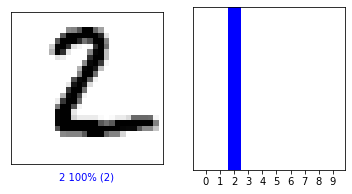

In [21]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred,  test_labels)
plt.show()

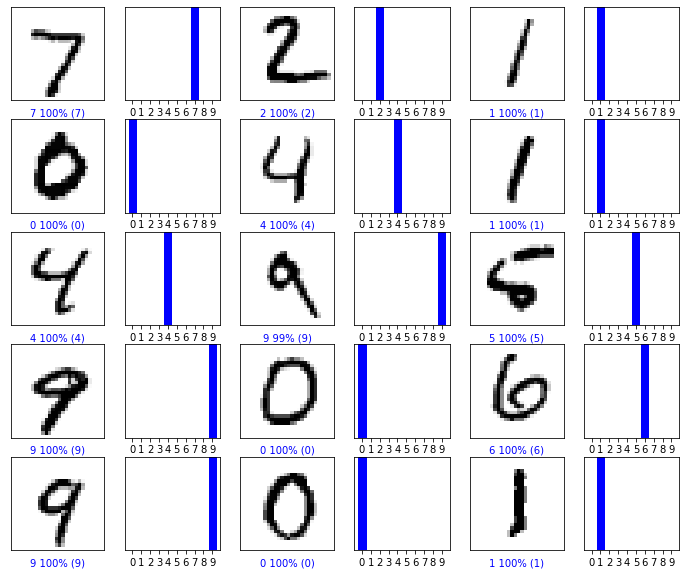

In [22]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred, test_labels)
plt.show()

## Plot images and probability that model predicted wrong

In [23]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

# change num_cols, num_rows if you want to see more result.  
def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

## Find index of wrong prediction
## Plot first 10 wrong predicted images and probability

In [24]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[43, 247, 259, 282, 321, 340, 341, 381, 417, 445]


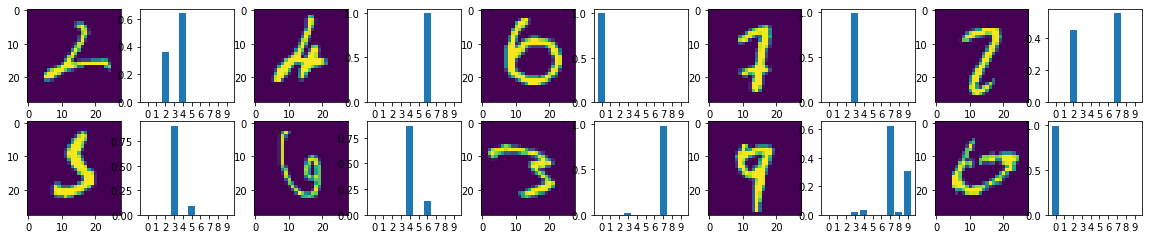

In [25]:
plot_error(index_slice, pred, test_labels)

# MODEL 2

In [26]:
model = select_model(2)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [28]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [29]:
model.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3760 - accuracy: 0.9442
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0732 - accuracy: 0.9781
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0553 - accuracy: 0.9838
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0499 - accuracy: 0.9851
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0435 - accuracy: 0.9869


In [30]:
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

313/313 - 1s - loss: 0.0631 - accuracy: 0.9829 - 872ms/epoch - 3ms/step

Test loss :  0.06310807913541794
Test accuracy : 0.9829000234603882


In [31]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

313/313 [==============================] - 1s 3ms/step


In [32]:
print('Prediction : ', pred.shape)
print('Test labels : ', test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


In [34]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

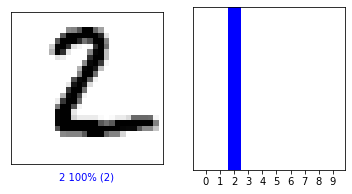

In [35]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred,  test_labels)
plt.show()

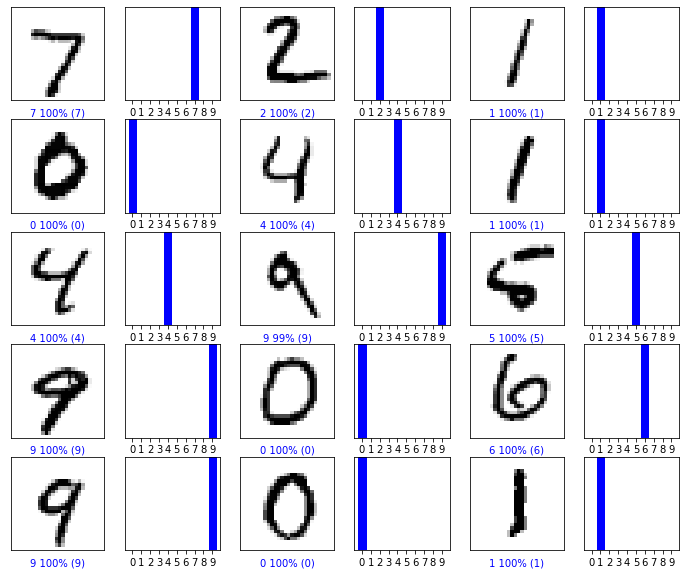

In [36]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred, test_labels)
plt.show()

In [37]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[18, 96, 115, 151, 217, 243, 321, 324, 381, 449]


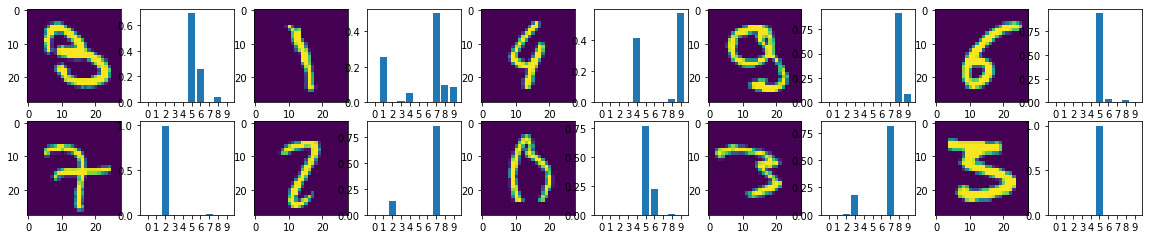

In [38]:
plot_error(index_slice, pred, test_labels)

# MODEL 3

In [39]:
model = select_model(3)

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 2, 2, 128)        

In [41]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [42]:
model.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1865 - accuracy: 0.9517
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0568 - accuracy: 0.9833
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0464 - accuracy: 0.9858
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0392 - accuracy: 0.9886
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0340 - accuracy: 0.9899


In [43]:
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

313/313 - 1s - loss: 0.0442 - accuracy: 0.9878 - 1s/epoch - 4ms/step

Test loss :  0.04419060796499252
Test accuracy : 0.9878000020980835


In [44]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

313/313 [==============================] - 1s 3ms/step


In [45]:
print('Prediction : ', pred.shape)
print('Test labels : ', test_labels.shape)

Prediction :  (10000, 10)
Test labels :  (10000,)


In [46]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

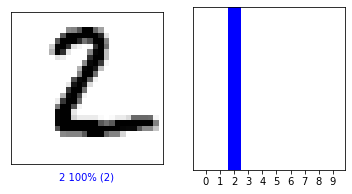

In [47]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred,  test_labels)
plt.show()

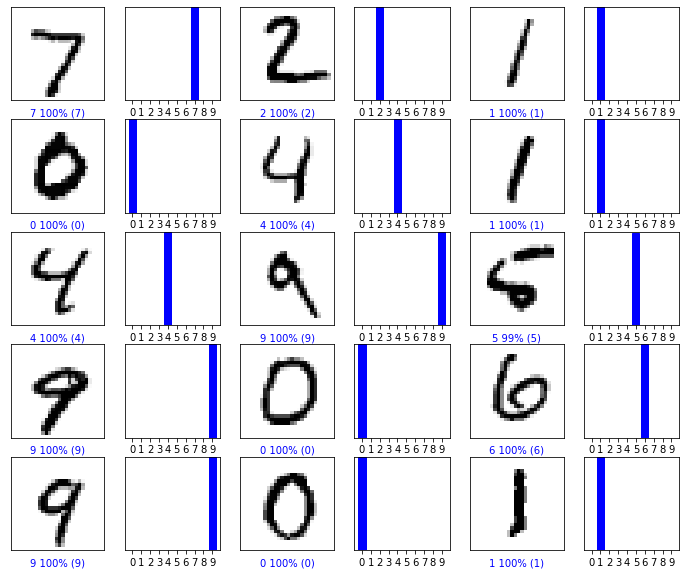

In [48]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred, test_labels)
plt.show()

In [49]:
index = error_mnist(pred, test_labels)
index_slice = index[:10]
print(index[:10])

[43, 290, 321, 381, 417, 448, 490, 625, 646, 659]


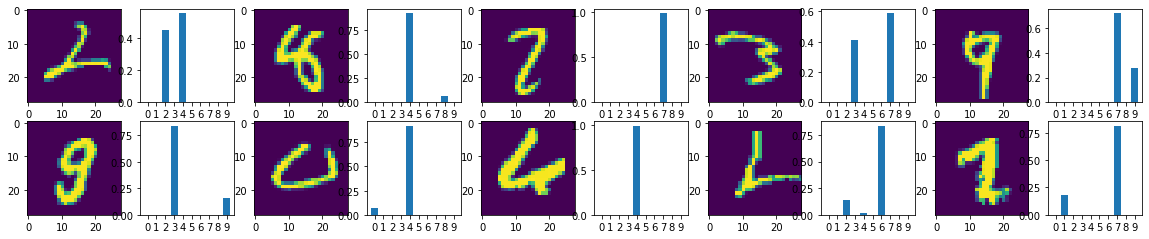

In [50]:
plot_error(index_slice, pred, test_labels)

In [ ]:
DONE